# This notebooks shows how to process the raw daily feed

In [1]:
import pandas as pd
import logging

logging.basicConfig(
    level=logging.INFO # allow DEBUG level messages to pass through the logger
    )

DAY_URL = "https://epss.cyentia.com/epss_scores-current.csv.gz"

def load_data(day_url = DAY_URL):
  try:
    logging.info('Downloading day feed')
    epss_df = pd.read_csv(DAY_URL,compression='gzip',sep=',')
    if len(epss_df) > 0 :
      logging.info('Done with total rows = %d' % len(epss_df))
      header = epss_df.iloc[0]
      if len(header)==2:
        version = header.index[0].split(':')[1]
        score_date = ''.join(header.index[1].split(':')[1:])
        epss_df.columns = epss_df.iloc[0]
        num_df = epss_df.iloc[1:].copy()
        del epss_df
        num_df['epss']=num_df['epss'].astype('float')
        num_df['percentile']=num_df['percentile'].astype('float')
        return (version,score_date,num_df)
      else:
        raise Exception('EPSS format is malformed')
  except Exception as ep:
    logging.error(ep)

/tmp/ipykernel_1881/1046852392.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Show version, date and some basic stats

In [2]:
(version,score_date,epss_df) = load_data()
logging.info(f'Date = {score_date} Version = {version}')
logging.info(f'Total entries {len(epss_df)}')
logging.info(f"Total CVE {epss_df.index.nunique()}")
assert len(epss_df) == epss_df.index.nunique()

INFO:root:Downloading day feed


INFO:root:Done with total rows = 223313


INFO:root:Date = 2024-02-02T000000+0000 Version = v2023.03.01


INFO:root:Total entries 223312


INFO:root:Total CVE 223312


## Plot simple charts

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

INFO:matplotlib.font_manager:Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


INFO:matplotlib.font_manager:generated new fontManager


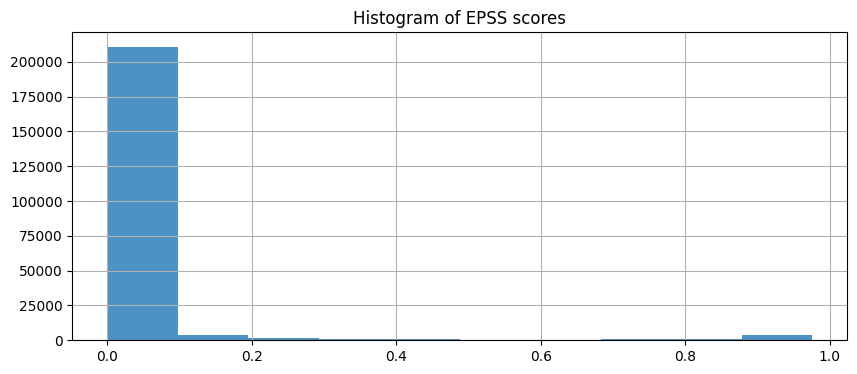

In [4]:
epss_df.hist(column='epss', alpha=0.8,figsize=(10,4))
plt.title('Histogram of EPSS scores')
plt.show()

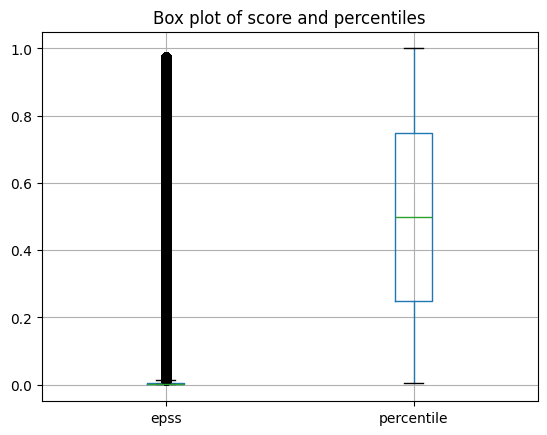

In [5]:
boxplot = epss_df.boxplot(column=['epss', 'percentile'])  
plt.title('Box plot of score and percentiles')
plt.show()

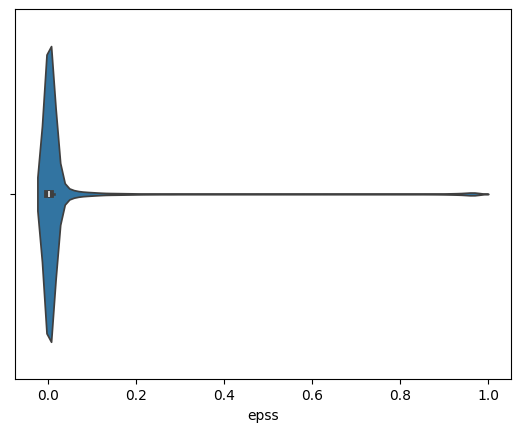

In [6]:
import seaborn as sb

sb.violinplot(x = 'epss',data = epss_df)

# display
plt.show()

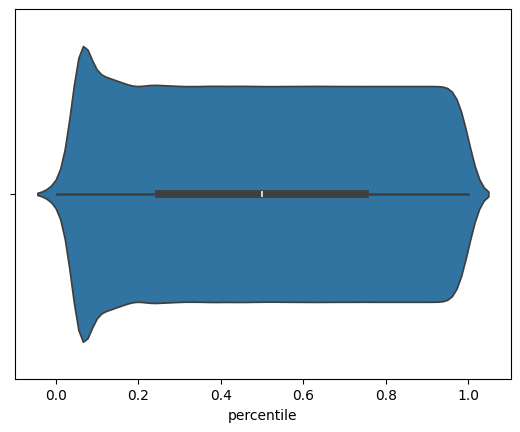

In [7]:
sb.violinplot(x = 'percentile',data = epss_df)

plt.show()

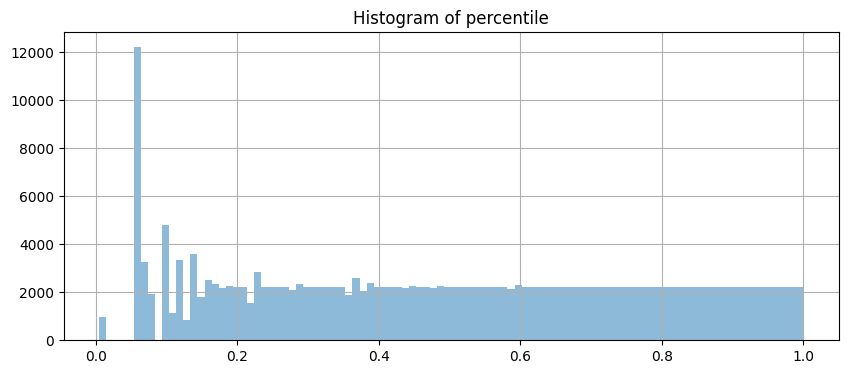

In [8]:
epss_df.hist(column='percentile',bins=100, alpha=0.5,figsize=(10,4))
plt.title('Histogram of percentile')
plt.show()

## Top CVSS

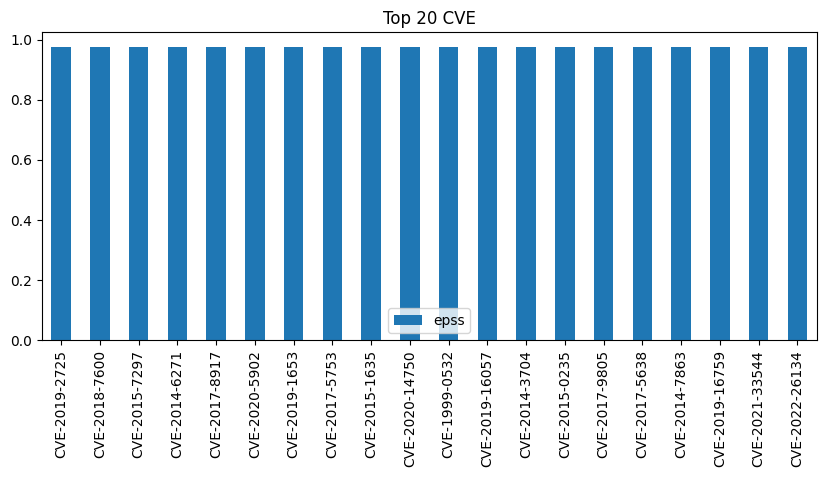

In [9]:
TOP = 20
epss_df.sort_values(by='epss',ascending=False).head(TOP).plot.bar(y='epss',figsize=(10,4))
plt.title(f'Top {TOP} CVE')
plt.show()

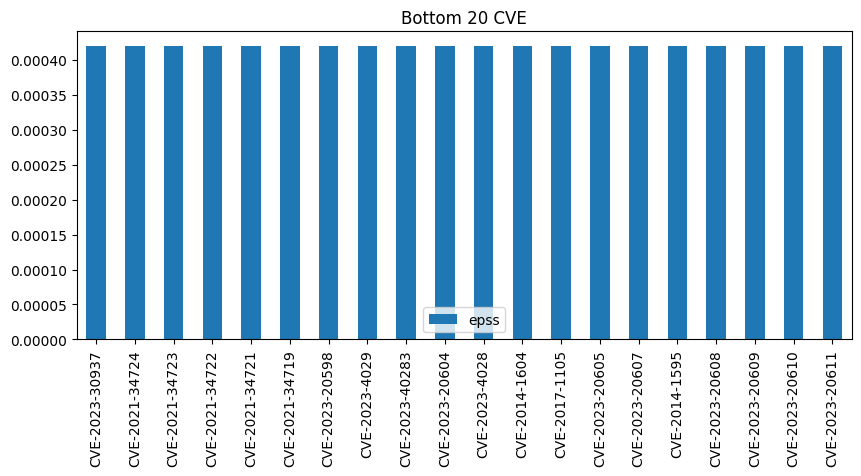

In [10]:
epss_df.sort_values(by='epss',ascending=True).head(TOP).plot.bar(y='epss',figsize=(10,4))
plt.title(f'Bottom {TOP} CVE')
plt.show()

# All done!